# Projeto Final IA

## Etapa 1

### Setup | Dependências

In [1]:
from pandas import DataFrame
from matplotlib import pyplot
import seaborn
import random
from typing import TypedDict, List, Tuple

### Loading Dataset

In [2]:
from pathlib import Path
import csv

fp = "../data/MotorUniversal_2k_5kHz_SemNorm.xlsx - TesteMotorUniversalAgoraVai2000.csv"


def parse_num(s: str) -> float:
    a = s.replace(",", ".")
    try:
        return float(a)
    except:
        return float("NaN")


class RelData(TypedDict):
    teste: int
    estado: int
    corrente: List[Tuple[int, float]]
    tensao: List[Tuple[int, float]]


class Data(TypedDict):
    id_teste: List[int]
    estado: List[int]
    corrente: List[float]
    tensao: List[float]
    iter_corrente: List[int]
    iter_tensao: List[int]


data: Data = {
    "id_teste": list(),
    "estado": list(),
    "corrente": list(),
    "tensao": list(),
    "iter_corrente": list(),
    "iter_tensao": list(),
}

data_rel: List[RelData] = list()
with Path(fp).open("r") as fd:
    file_data = csv.reader(fd, delimiter=",")
    next(file_data)
    for index, line in enumerate(file_data):
        correntes = list(map(parse_num, line[1:1001]))
        tensoes = list(map(parse_num, line[1001:]))
        estado = int(line[0])
        assert len(correntes) == len(tensoes)
        test_iters = list(range(1, len(tensoes) + 1))
        assert len(test_iters) == len(tensoes)

        data.update(Data(
            id_teste=[*data["id_teste"], *[index]*len(tensoes)],
            estado=[*data["estado"], *[estado]*len(tensoes)],
            corrente=[*data["corrente"], *correntes],
            tensao=[*data["tensao"], *tensoes],
            iter_corrente=[*data["iter_corrente"], *test_iters],
            iter_tensao=[*data["iter_tensao"], *test_iters],
        ))

        data_rel.append({
            "teste": index,
            "estado": estado,
            "corrente": list(map(lambda v: (v[0], v[1]), enumerate(correntes))),
            "tensao": list(map(lambda v: (v[0], v[1]), enumerate(tensoes)))
        })


### Metrics

In [3]:
df = DataFrame(data)


In [4]:
df.melt(id_vars=("id_teste", "iter_tensao"), value_vars=("tensao",)).describe()


,id_teste,iter_tensao,value
count,500000.000000,500000.000000,499991.000000
mean,249.500000,500.500000,21.969585
std,144.337423,288.675279,2.419560
min,0.000000,1.000000,0.234658
25%,124.750000,250.750000,21.124460
50%,249.500000,500.500000,21.756133
75%,374.250000,750.250000,22.589790
max,499.000000,1000.000000,1214.356000


In [5]:
df.pivot(index="iter_tensao", columns="id_teste", values="tensao").describe()


id_teste,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.151397,22.066898,22.070464,22.012264,22.076911,22.086048,22.088501,22.069895,22.074107,22.080849,...,21.997622,22.045427,22.053560,22.050715,22.050948,22.086528,22.053290,22.061742,22.079134,22.038410
std,2.915630,0.698623,0.695412,0.714062,0.728945,0.730893,0.746671,0.756620,0.763320,0.784453,...,2.091182,2.007481,2.018028,1.969090,1.993388,2.001745,1.994681,1.983864,1.972268,2.053530
min,20.717903,20.797650,20.874197,20.803209,20.865724,20.877126,20.870344,20.873758,20.832422,20.820335,...,1.239898,18.977551,18.947160,19.033020,19.047472,19.032604,18.970641,19.016752,19.064274,1.256898
25%,21.526676,21.530811,21.536247,21.479250,21.538106,21.531678,21.507696,21.499697,21.479303,21.470685,...,21.219168,21.219063,21.205085,21.242107,21.199334,21.218938,21.214786,21.201252,21.226715,21.101819
50%,21.974925,22.007237,21.998154,21.923127,21.977113,21.995395,21.994404,21.966825,21.952544,21.971979,...,21.718853,21.745502,21.720639,21.719322,21.702417,21.729746,21.692819,21.709380,21.709244,21.725131
75%,22.457895,22.442913,22.424075,22.342813,22.441266,22.480050,22.474652,22.478748,22.498998,22.500855,...,22.290222,22.356341,22.364587,22.326704,22.380519,22.439204,22.408607,22.415059,22.420673,22.583533
max,111.454900,24.476110,24.456592,24.547889,24.573959,24.551453,24.530846,24.530196,24.580099,24.717669,...,39.041094,38.939503,38.781628,38.539464,38.677322,38.675231,38.465177,38.360738,38.152791,37.754298


In [6]:
df.loc[df["estado"] == 0].pivot(index="iter_tensao", columns="id_teste", values="tensao").describe()

id_teste,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.151397,22.066898,22.070464,22.012264,22.076911,22.086048,22.088501,22.069895,22.074107,22.080849,...,22.192901,22.166765,22.186051,22.178423,22.174036,22.173860,22.180751,22.175724,22.185222,22.128705
std,2.915630,0.698623,0.695412,0.714062,0.728945,0.730893,0.746671,0.756620,0.763320,0.784453,...,1.694438,1.694576,1.666171,1.653464,1.632615,1.601480,1.583517,1.566267,1.532096,1.675459
min,20.717903,20.797650,20.874197,20.803209,20.865724,20.877126,20.870344,20.873758,20.832422,20.820335,...,19.471591,19.432302,19.494612,19.508227,19.557849,19.578661,19.603641,19.628068,19.667758,19.451020
25%,21.526676,21.530811,21.536247,21.479250,21.538106,21.531678,21.507696,21.499697,21.479303,21.470685,...,21.127252,21.101783,21.087396,21.088369,21.107732,21.110577,21.146384,21.154317,21.172859,20.973588
50%,21.974925,22.007237,21.998154,21.923127,21.977113,21.995395,21.994404,21.966825,21.952544,21.971979,...,21.759134,21.754508,21.783720,21.767370,21.779528,21.797808,21.802886,21.805974,21.830294,21.965522
75%,22.457895,22.442913,22.424075,22.342813,22.441266,22.480050,22.474652,22.478748,22.498998,22.500855,...,22.927348,22.902078,22.856803,22.851930,22.817343,22.778975,22.778378,22.754873,22.751995,22.855448
max,111.454900,24.476110,24.456592,24.547889,24.573959,24.551453,24.530846,24.530196,24.580099,24.717669,...,27.824023,27.768099,27.767797,27.767385,27.680015,27.662578,27.665964,27.605160,27.511786,27.086285


In [7]:
df.loc[df["estado"] == 1].pivot(index="iter_tensao", columns="id_teste", values="tensao").describe()

id_teste,300,301,302,303,304,305,306,307,308,309,...,390,391,392,393,394,395,396,397,398,399
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.661692,21.681459,21.688354,21.665613,21.680310,21.693583,21.680670,21.685257,21.687783,21.677127,...,21.665359,21.421099,21.429823,21.546237,21.406892,21.399671,21.393575,21.399277,21.401754,21.511590
std,2.962078,2.971683,2.975772,2.965207,2.975049,2.960501,2.967288,2.958023,2.977334,2.971613,...,2.604862,2.463056,2.505399,2.606675,2.505452,2.524512,2.592946,2.532921,2.526384,2.884008
min,18.120826,18.134489,18.134629,18.140504,18.133529,18.155023,18.139556,18.144817,18.121790,18.101537,...,18.482401,18.517004,18.449093,18.425958,18.471035,18.474126,2.365598,18.444357,18.474283,17.486198
25%,19.269554,19.263030,19.260436,19.228780,19.240685,19.263167,19.241635,19.249953,19.243038,19.225352,...,19.580009,19.566364,19.540084,19.542823,19.508443,19.478074,19.495360,19.463119,19.464700,19.335202
50%,20.533574,20.560977,20.571023,20.526094,20.573165,20.589793,20.554702,20.574593,20.569603,20.550811,...,20.725070,20.508623,20.510659,20.596559,20.492948,20.451157,20.470862,20.462869,20.475030,20.340939
75%,23.899658,23.929170,23.907837,23.927958,23.918156,23.922947,23.969738,23.878399,23.932999,23.922229,...,23.338679,22.834367,22.833655,23.055822,22.860965,22.840809,22.870642,22.900067,22.876088,23.784118
max,31.330728,31.481041,31.610174,31.502690,31.519261,31.487380,31.541679,31.498433,31.473810,31.465614,...,30.388646,30.628146,30.735887,30.789807,30.794212,30.702223,30.738778,30.702104,30.589337,29.523226


In [8]:
df.loc[df["estado"] == 2].pivot(index="iter_tensao", columns="id_teste", values="tensao").describe()

id_teste,400,401,402,403,404,405,406,407,408,409,...,490,491,492,493,494,495,496,497,498,499
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.950577,21.970966,21.978214,21.992417,21.982863,21.983941,21.997255,21.978670,21.993951,21.982096,...,21.997622,22.045427,22.053560,22.050715,22.050948,22.086528,22.053290,22.061742,22.079134,22.038410
std,2.176361,2.194808,2.185534,2.217620,2.171289,2.205934,2.214456,2.189555,2.216494,2.167207,...,2.091182,2.007481,2.018028,1.969090,1.993388,2.001745,1.994681,1.983864,1.972268,2.053530
min,18.454609,18.442070,18.463695,18.455772,18.472601,18.459621,18.462822,18.481678,18.481758,18.429284,...,1.239898,18.977551,18.947160,19.033020,19.047472,19.032604,18.970641,19.016752,19.064274,1.256898
25%,21.153727,21.147340,21.131931,21.123242,21.106070,21.109155,21.106297,21.069791,21.083881,21.104052,...,21.219168,21.219063,21.205085,21.242107,21.199334,21.218938,21.214786,21.201252,21.226715,21.101819
50%,21.611128,21.631224,21.644061,21.636789,21.630694,21.611906,21.636468,21.609051,21.619461,21.658152,...,21.718853,21.745502,21.720639,21.719322,21.702417,21.729746,21.692819,21.709380,21.709244,21.725131
75%,22.252415,22.276747,22.329443,22.355204,22.332967,22.372754,22.385225,22.415970,22.385049,22.378853,...,22.290222,22.356341,22.364587,22.326704,22.380519,22.439204,22.408607,22.415059,22.420673,22.583533
max,41.732072,41.738881,41.121987,41.479216,41.505862,41.494329,41.341459,41.265634,41.263607,41.389890,...,39.041094,38.939503,38.781628,38.539464,38.677322,38.675231,38.465177,38.360738,38.152791,37.754298


In [9]:
df.melt(id_vars=("id_teste", "iter_corrente"),
        value_vars=("corrente",)).describe()


,id_teste,iter_corrente,value
count,500000.000000,500000.000000,499986.000000
mean,249.500000,500.500000,0.732191
std,144.337423,288.675279,0.096716
min,0.000000,1.000000,0.595338
25%,124.750000,250.750000,0.680154
50%,249.500000,500.500000,0.700813
75%,374.250000,750.250000,0.730608
max,499.000000,1000.000000,11.554880


In [10]:
df.pivot(index="iter_corrente", columns="id_teste",
         values="corrente").describe()


id_teste,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,999.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.683705,0.679833,0.690525,0.692794,0.680013,0.672279,0.673860,0.676992,0.675490,0.673339,...,0.715595,0.704115,0.704142,0.690316,0.690762,0.685177,0.692129,0.690922,0.686268,0.708508
std,0.005013,0.004669,0.122341,0.004744,0.004832,0.004811,0.004587,0.004863,0.004762,0.005043,...,0.018205,0.018885,0.017938,0.019413,0.019412,0.018875,0.019304,0.018319,0.020212,0.016834
min,0.672482,0.669572,0.674844,0.680766,0.667668,0.660557,0.662690,0.665733,0.663650,0.660938,...,0.678049,0.665664,0.666970,0.658474,0.658636,0.649102,0.660005,0.654469,0.652661,0.671933
25%,0.680375,0.676781,0.683417,0.689551,0.676739,0.669083,0.670774,0.673734,0.672259,0.669908,...,0.699961,0.686649,0.687772,0.671092,0.671230,0.667231,0.672554,0.673931,0.664508,0.695551
50%,0.683377,0.679917,0.686834,0.692981,0.680266,0.672396,0.674042,0.677186,0.675597,0.673585,...,0.718886,0.708246,0.707925,0.691913,0.692294,0.689260,0.693982,0.694323,0.689389,0.715114
75%,0.686814,0.682305,0.689457,0.695513,0.682793,0.675312,0.676769,0.680126,0.678364,0.676616,...,0.731750,0.720462,0.719682,0.708924,0.709249,0.701670,0.710279,0.706549,0.704864,0.720723
max,0.717573,0.719402,4.548630,0.729627,0.714636,0.709658,0.705956,0.714153,0.712675,0.707592,...,0.754034,0.749894,0.737908,0.723822,0.724950,0.722422,0.726260,0.726733,0.747386,0.740270


In [11]:
df.loc[df["estado"] == 0].pivot(index="iter_corrente", columns="id_teste",
         values="corrente").describe()

id_teste,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,999.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000
mean,0.683705,0.679833,0.690525,0.692794,0.680013,0.672279,0.673860,0.676992,0.675490,0.673339,...,0.646208,0.646573,0.646860,0.645952,0.647369,0.647469,0.648293,0.646802,0.646597,0.651253
std,0.005013,0.004669,0.122341,0.004744,0.004832,0.004811,0.004587,0.004863,0.004762,0.005043,...,0.009244,0.008658,0.008404,0.008534,0.008823,0.008151,0.008025,0.008148,0.008444,0.009009
min,0.672482,0.669572,0.674844,0.680766,0.667668,0.660557,0.662690,0.665733,0.663650,0.660938,...,0.622967,0.623222,0.623547,0.624696,0.626060,0.625455,0.625810,0.625175,0.625630,0.624646
25%,0.680375,0.676781,0.683417,0.689551,0.676739,0.669083,0.670774,0.673734,0.672259,0.669908,...,0.639443,0.640352,0.640765,0.639844,0.641069,0.641827,0.642630,0.641069,0.640467,0.645778
50%,0.683377,0.679917,0.686834,0.692981,0.680266,0.672396,0.674042,0.677186,0.675597,0.673585,...,0.646478,0.646980,0.647005,0.646176,0.647611,0.647525,0.648641,0.647029,0.646702,0.651770
75%,0.686814,0.682305,0.689457,0.695513,0.682793,0.675312,0.676769,0.680126,0.678364,0.676616,...,0.653822,0.653702,0.653584,0.652937,0.654451,0.653810,0.654620,0.653089,0.653582,0.657173
max,0.717573,0.719402,4.548630,0.729627,0.714636,0.709658,0.705956,0.714153,0.712675,0.707592,...,0.675459,0.674954,0.676536,0.665202,0.692692,0.671791,0.671731,0.685244,0.671677,0.702621


In [12]:
df.loc[df["estado"] == 1].pivot(index="iter_corrente", columns="id_teste",
         values="corrente").describe()

id_teste,300,301,302,303,304,305,306,307,308,309,...,390,391,392,393,394,395,396,397,398,399
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.917496,0.908892,0.909073,0.915238,0.908415,0.911106,0.908766,0.911012,0.909362,0.909534,...,0.900874,0.892253,0.892595,0.882435,0.886439,0.884072,0.883269,0.880693,0.872471,0.921486
std,0.104049,0.103872,0.102218,0.104353,0.103952,0.102796,0.102999,0.103170,0.103931,0.104097,...,0.089257,0.087629,0.090301,0.087518,0.090066,0.090662,0.090547,0.091208,0.089036,0.110433
min,0.777145,0.767478,0.769442,0.773139,0.766655,0.770663,0.768191,0.770437,0.767823,0.768259,...,0.773086,0.766916,0.763054,0.758842,0.758013,0.754958,0.754743,0.752137,0.748447,0.765890
25%,0.825994,0.817915,0.819324,0.823577,0.817427,0.821063,0.818278,0.820617,0.818281,0.818293,...,0.823635,0.818437,0.815886,0.811171,0.809706,0.807865,0.806872,0.804424,0.800845,0.814423
50%,0.897444,0.890231,0.891614,0.897485,0.889656,0.893531,0.890624,0.892673,0.890917,0.890485,...,0.884319,0.875009,0.875382,0.859552,0.868723,0.864994,0.863792,0.860933,0.846234,0.908281
75%,1.019204,1.011722,1.010045,1.017624,1.010952,1.012624,1.010279,1.012297,1.010871,1.011785,...,0.981868,0.972204,0.976450,0.962544,0.969936,0.969042,0.968631,0.967234,0.955056,1.033513
max,1.105040,1.097706,1.093313,1.103836,1.097913,1.095642,1.093611,1.098391,1.098196,1.099584,...,1.053953,1.063973,1.050343,1.060045,1.045088,1.043571,1.042764,1.042043,1.070402,1.107157


In [13]:
df.loc[df["estado"] == 2].pivot(index="iter_corrente", columns="id_teste",
         values="corrente").describe()

id_teste,400,401,402,403,404,405,406,407,408,409,...,490,491,492,493,494,495,496,497,498,499
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.738564,0.727249,0.727866,0.721234,0.717556,0.717014,0.711521,0.713930,0.714378,0.713228,...,0.715595,0.704115,0.704142,0.690316,0.690762,0.685177,0.692129,0.690922,0.686268,0.708508
std,0.017330,0.017093,0.017540,0.018598,0.018531,0.017779,0.016506,0.018955,0.018770,0.018811,...,0.018205,0.018885,0.017938,0.019413,0.019412,0.018875,0.019304,0.018319,0.020212,0.016834
min,0.701472,0.690473,0.690324,0.682823,0.684512,0.678433,0.673590,0.678132,0.681218,0.677978,...,0.678049,0.665664,0.666970,0.658474,0.658636,0.649102,0.660005,0.654469,0.652661,0.671933
25%,0.725836,0.715027,0.714802,0.706060,0.698705,0.703749,0.699271,0.695477,0.696186,0.695124,...,0.699961,0.686649,0.687772,0.671092,0.671230,0.667231,0.672554,0.673931,0.664508,0.695551
50%,0.744552,0.733578,0.734244,0.726953,0.720321,0.723294,0.717438,0.715666,0.715915,0.719446,...,0.718886,0.708246,0.707925,0.691913,0.692294,0.689260,0.693982,0.694323,0.689389,0.715114
75%,0.752437,0.740274,0.741781,0.736482,0.733976,0.731148,0.724250,0.730993,0.731340,0.729432,...,0.731750,0.720462,0.719682,0.708924,0.709249,0.701670,0.710279,0.706549,0.704864,0.720723
max,0.771797,0.770606,0.779309,0.779215,0.749585,0.762072,0.750196,0.747778,0.747913,0.759533,...,0.754034,0.749894,0.737908,0.723822,0.724950,0.722422,0.726260,0.726733,0.747386,0.740270


### Scatter Plot

In [14]:
def get_color_by_state(estado: int) -> str:
    match estado:
        case 0: return "green"
        case 1: return "blue"
        case 2: return "red"
    return "yellow"


In [20]:
def plot_scatter(data_rel: List[RelData]):
    fig = pyplot.figure()
    ax = fig.add_subplot(projection="3d")

    data_0 = list(filter(lambda d: d["estado"] == 0, data_rel))
    data_1 = list(filter(lambda d: d["estado"] == 1, data_rel))
    data_2 = list(filter(lambda d: d["estado"] == 2, data_rel))
    x: List[float] = list()
    y: List[float] = list()
    z: List[float] = list()
    for d in data_0:
        x.extend(list(map(lambda v: v[1], d['tensao'])))
        z.extend(list(map(lambda v: v[1], d['corrente'])))
        y.extend(list(map(lambda v: v[0], d['corrente'])))
    color = get_color_by_state(0)
    ax.scatter(x, y, z, color=color, label="Estado 0")

    x = list()
    y = list()
    z = list()
    for d in data_1:
        x.extend(list(map(lambda v: v[1], d['tensao'])))
        z.extend(list(map(lambda v: v[1], d['corrente'])))
        y.extend(list(map(lambda v: v[0], d['corrente'])))
    color = get_color_by_state(1)
    ax.scatter(x, y, z, color=color, label="Estado 1")

    x = list()
    y = list()
    z = list()
    for d in data_2:
        x.extend(list(map(lambda v: v[1], d['tensao'])))
        z.extend(list(map(lambda v: v[1], d['corrente'])))
        y.extend(list(map(lambda v: v[0], d['corrente'])))
    color = get_color_by_state(2)
    ax.scatter(x, y, z, color=color, label="Estado 2")
    
    # ax.legend(("estado 0", "estado 1", "estado 2"), loc="upper right")
    ax.set_xlabel("Tensão")
    ax.set_ylabel("Registro")
    ax.set_zlabel("Corrente")  # type: ignore
    ax.set_title("Distribuição (Corrente | Tensão | Registro)")

    fig.legend(loc="upper right")
    fig.tight_layout()

    fig_2 = pyplot.figure()
    ax_2 = fig_2.add_subplot(projection="3d")

    x = list()
    y = list()
    z = list()
    for d in data_0:
        x.extend(list(map(lambda v: v[1], d['corrente'])))
        z.extend(list(map(lambda v: v[0], d['corrente'])))
        y.extend(list(map(lambda v: v[1], d['tensao'])))
    color = get_color_by_state(0)
    ax_2.scatter(x, y, z, color=color, label="Estado 0")

    x = list()
    y = list()
    z = list()
    for d in data_1:
        x.extend(list(map(lambda v: v[1], d['corrente'])))
        z.extend(list(map(lambda v: v[0], d['corrente'])))
        y.extend(list(map(lambda v: v[1], d['tensao'])))
    color = get_color_by_state(1)
    ax_2.scatter(x, y, z, color=color, label="Estado 1")

    x = list()
    y = list()
    z = list()
    for d in data_2:
        x.extend(list(map(lambda v: v[1], d['corrente'])))
        z.extend(list(map(lambda v: v[0], d['corrente'])))
        y.extend(list(map(lambda v: v[1], d['tensao'])))
    color = get_color_by_state(2)
    ax_2.scatter(x, y, z, color=color, label="Estado 2")
    
    # ax.legend(("estado 0", "estado 1", "estado 2"), loc="upper right")
    ax_2.set_xlabel("Corrente")
    ax_2.set_ylabel("Tensão")
    ax_2.set_zlabel("Registro")  # type: ignore
    ax_2.set_title("Distribuição (Corrente | Tensão | Registro)")

    fig_2.legend(loc="upper right")
    fig_2.tight_layout()

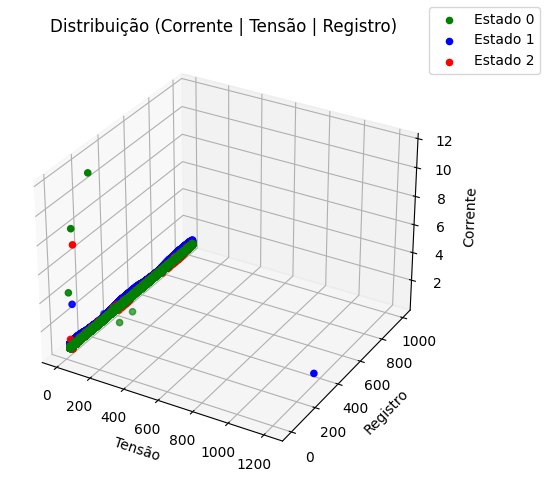

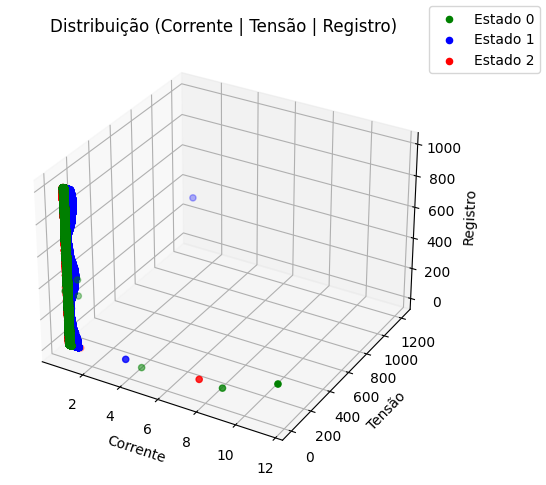

In [16]:
plot_scatter(data_rel)

## Limpeza

## Scatter Plot Limpo

In [22]:
clean_data_rel: List[RelData] = list()

for d in data_rel:
    t = list(filter(lambda v: v[1] < 75, d["tensao"]))
    c = list(filter(lambda v: v[1] < 1.2, d["corrente"]))
    t = list(filter(lambda v: v[0] in list(map(lambda x: x[0], c)), t))
    c = list(filter(lambda v: v[0] in list(map(lambda x: x[0], t)), c))
    assert len(c) == len(t), f"{c} {t}"
    clean_data_rel.append({
        'teste': d["teste"],
        'estado': d["estado"],
        'tensao': t,
        'corrente': c
    })
    # print(len(clean_data_rel))


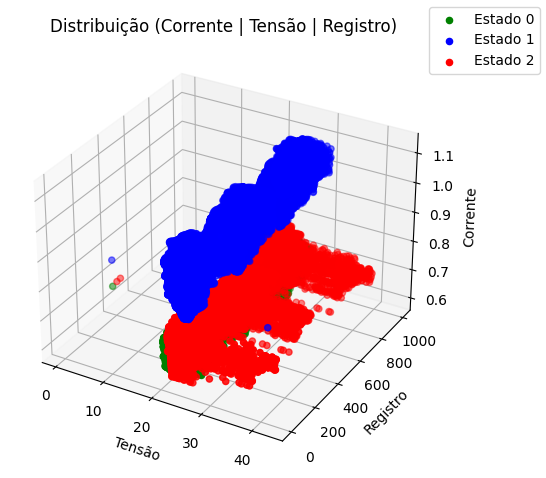

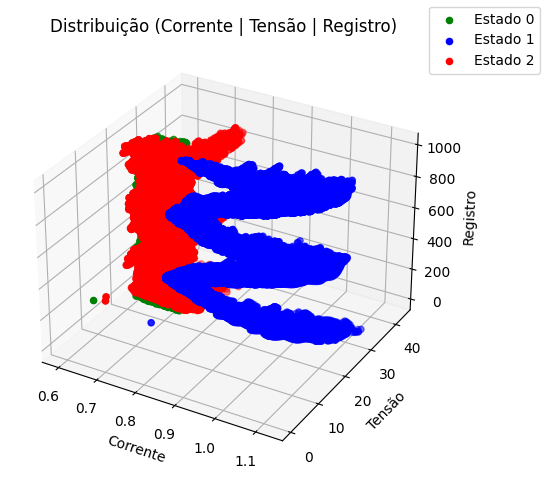

In [21]:
plot_scatter(clean_data_rel)

### Testes

In [24]:
df_state_0 = df.loc[df['estado'] == 0]
df_state_1 = df.loc[df['estado'] == 1]
df_state_2 = df.loc[df['estado'] == 2]

Text(0.5, 0, 'Registro')

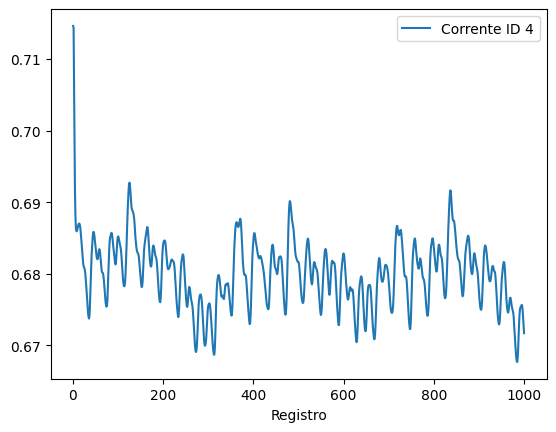

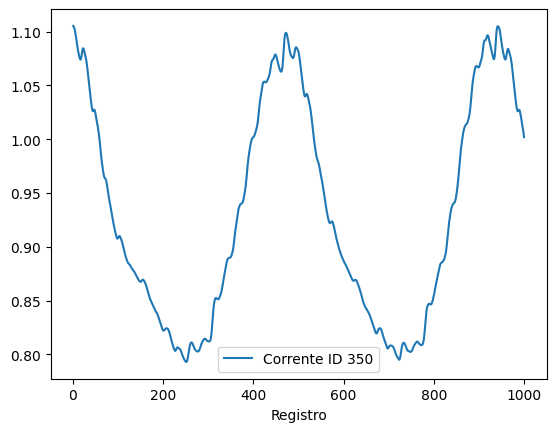

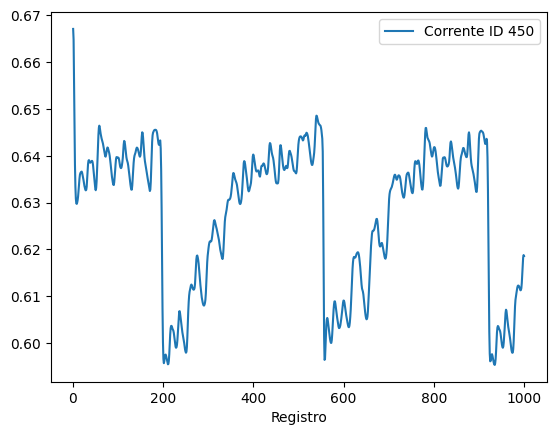

In [27]:
melted = df_state_0.melt(id_vars=("id_teste", "iter_corrente"), value_vars=("corrente",))
ax = melted.loc[melted['id_teste'] == 4].loc[melted['value'] < 1.2].plot(x="iter_corrente", y="value")
ax.legend(["Corrente ID 4"])
ax.set_xlabel("Registro")

melted = df_state_1.melt(id_vars=("id_teste", "iter_corrente"), value_vars=("corrente",))
ax = melted.loc[melted['id_teste'] == 350].loc[melted['value'] < 1.2].plot(x="iter_corrente", y="value")
ax.legend(["Corrente ID 350"])
ax.set_xlabel("Registro")

melted = df_state_2.melt(id_vars=("id_teste", "iter_corrente"), value_vars=("corrente",))
ax = melted.loc[melted['id_teste'] == 450].loc[melted['value'] < 1.2].plot(x="iter_corrente", y="value")
ax.legend(["Corrente ID 450"])
ax.set_xlabel("Registro")

Text(0.5, 0, 'Registro')

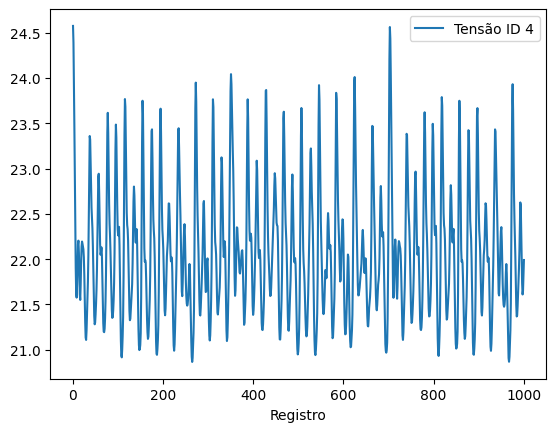

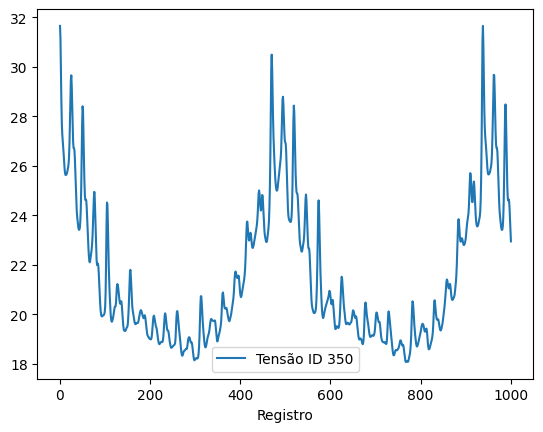

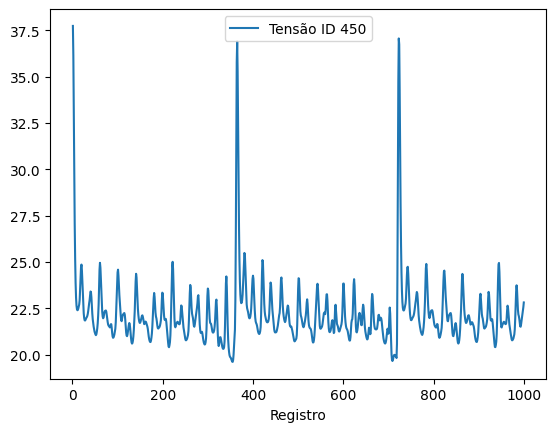

In [28]:
melted = df_state_0.melt(id_vars=("id_teste", "iter_tensao"), value_vars=("tensao",))
ax = melted.loc[melted['id_teste'] == 4].loc[melted['value'] < 75].plot(x="iter_tensao", y="value")
ax.legend(["Tensão ID 4"])
ax.set_xlabel("Registro")

melted = df_state_1.melt(id_vars=("id_teste", "iter_tensao"), value_vars=("tensao",))
ax = melted.loc[melted['id_teste'] == 350].loc[melted['value'] < 75].plot(x="iter_tensao", y="value")
ax.legend(["Tensão ID 350"])
ax.set_xlabel("Registro")

melted = df_state_2.melt(id_vars=("id_teste", "iter_tensao"), value_vars=("tensao",))
ax = melted.loc[melted['id_teste'] == 450].loc[melted['value'] < 75].plot(x="iter_tensao", y="value")
ax.legend(["Tensão ID 450"])
ax.set_xlabel("Registro")

#### Boxplot

<AxesSubplot: xlabel='id_teste', ylabel='value'>

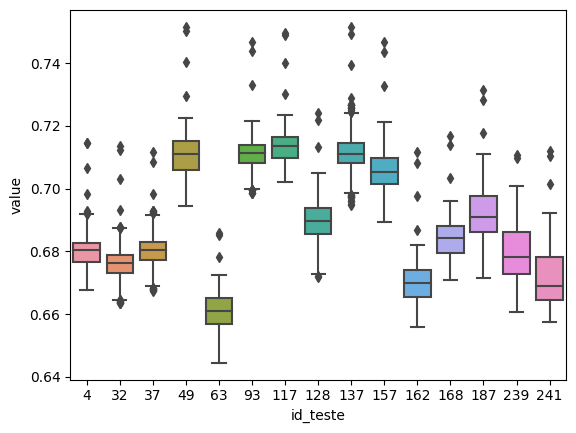

In [ ]:
ids = random.sample(list(df_state_0["id_teste"].unique()), 15)
df_melted = df_state_0.melt(
    id_vars=("id_teste", "iter_corrente"), value_vars=("corrente",))
# df_melted = melted.loc[melted['id_teste'] == 450].loc[melted['value'] < 2]
df_melted = df_melted.loc[df_melted["id_teste"].isin(ids)].loc[df_melted['value'] < 2]

seaborn.boxplot(x="id_teste", y="value", data=df_melted)

<AxesSubplot: xlabel='id_teste', ylabel='value'>

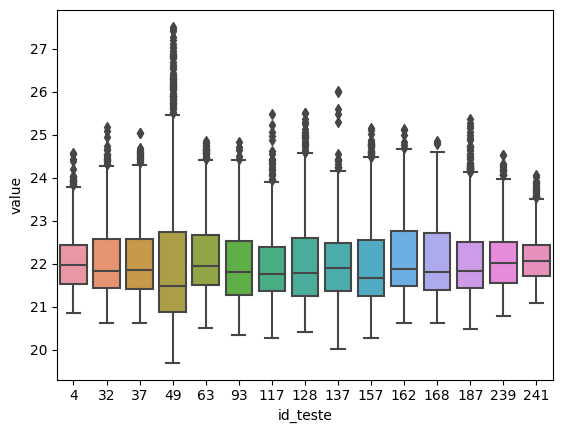

In [ ]:
df_melted = df_state_0.melt(
    id_vars=("id_teste", "iter_tensao"), value_vars=("tensao",))
# df_melted = melted.loc[melted['id_teste'] == 450].loc[melted['value'] < 2]
df_melted = df_melted.loc[df_melted["id_teste"].isin(ids)].loc[df_melted['value'] < 75]

seaborn.boxplot(x="id_teste", y="value", data=df_melted)

<AxesSubplot: xlabel='id_teste', ylabel='value'>

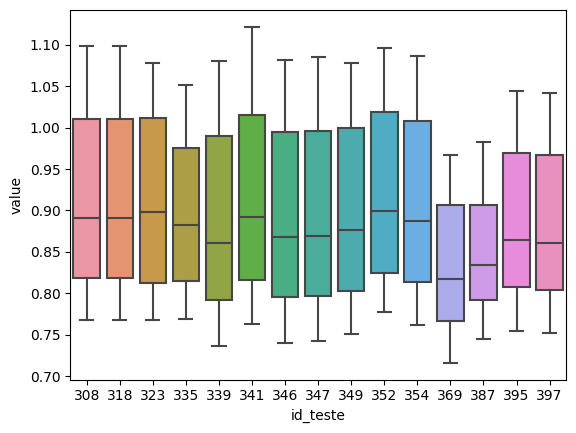

In [ ]:
ids = random.sample(list(df_state_1["id_teste"].unique()), 15)
df_melted = df_state_1.melt(
    id_vars=("id_teste", "iter_corrente"), value_vars=("corrente",))
# df_melted = melted.loc[melted['id_teste'] == 450].loc[melted['value'] < 2]
df_melted = df_melted.loc[df_melted["id_teste"].isin(ids)].loc[df_melted['value'] < 2]

seaborn.boxplot(x="id_teste", y="value", data=df_melted)

<AxesSubplot: xlabel='id_teste', ylabel='value'>

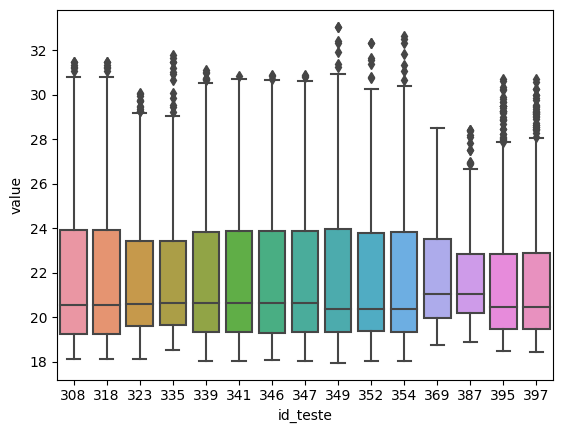

In [ ]:
df_melted = df_state_1.melt(
    id_vars=("id_teste", "iter_tensao"), value_vars=("tensao",))
# df_melted = melted.loc[melted['id_teste'] == 450].loc[melted['value'] < 2]
df_melted = df_melted.loc[df_melted["id_teste"].isin(ids)].loc[df_melted['value'] < 75]

seaborn.boxplot(x="id_teste", y="value", data=df_melted)

<AxesSubplot: xlabel='id_teste', ylabel='value'>

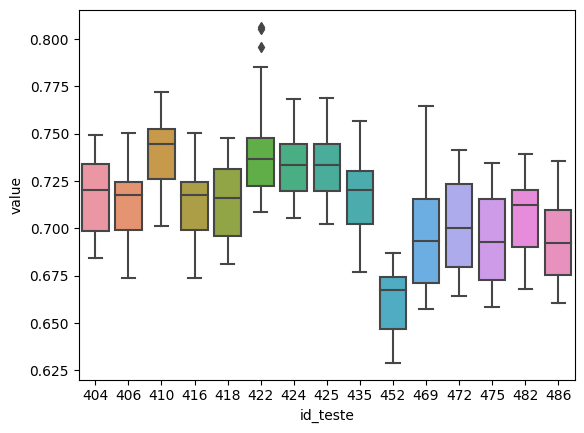

In [ ]:
ids = random.sample(list(df_state_2["id_teste"].unique()), 15)
df_melted = df_state_2.melt(
    id_vars=("id_teste", "iter_corrente"), value_vars=("corrente",))
# df_melted = melted.loc[melted['id_teste'] == 450].loc[melted['value'] < 2]
df_melted = df_melted.loc[df_melted["id_teste"].isin(ids)].loc[df_melted['value'] < 2]

seaborn.boxplot(x="id_teste", y="value", data=df_melted)

<AxesSubplot: xlabel='id_teste', ylabel='value'>

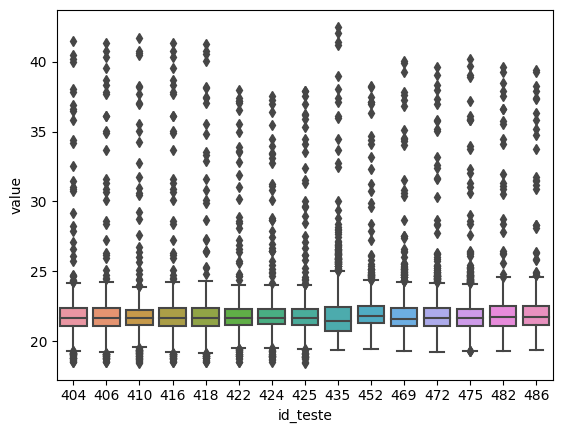

In [ ]:
df_melted = df_state_2.melt(
    id_vars=("id_teste", "iter_tensao"), value_vars=("tensao",))
# df_melted = melted.loc[melted['id_teste'] == 450].loc[melted['value'] < 2]
df_melted = df_melted.loc[df_melted["id_teste"].isin(ids)].loc[df_melted['value'] < 75]

seaborn.boxplot(x="id_teste", y="value", data=df_melted)